In [50]:
import pandas as pd
import numpy as np
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [31]:
X = pickle.load(open('X_scaled.p', 'rb'))
y = pickle.load(open('y.p', 'rb'))

In [32]:
train_size = 0.6
loc_test = int(X.shape[0]*train_size)
X_train, X_test = X.iloc[:loc_test], X.iloc[loc_test:]
y_train, y_test = y.iloc[:loc_test], y.iloc[loc_test:]

In [33]:
X_train.head()

,log_returns_t_minus_1,log_volumes_t_minus_1,log_counts_t_minus_1,log_returns_t_minus_10,log_volumes_t_minus_10,log_counts_t_minus_10,log_returns_t_minus_100,log_volumes_t_minus_100,log_counts_t_minus_100
timestamp,,,,,,,,,
2018-01-01 00:01:00,-0.001062,-9.741894e-07,-0.000003,-0.003509,-0.000004,-0.000019,-0.011799,-0.00004,-0.000177
2018-01-01 00:02:00,-1.007810,-6.992360e-02,0.457159,-0.003509,-0.000004,-0.000019,-0.011799,-0.00004,-0.000177
2018-01-01 00:03:00,-1.935252,2.302382e+00,2.528186,-0.003509,-0.000004,-0.000019,-0.011799,-0.00004,-0.000177
2018-01-01 00:04:00,1.048278,-1.878305e+00,-1.586419,-0.003509,-0.000004,-0.000019,-0.011799,-0.00004,-0.000177
2018-01-01 00:05:00,-2.932456,-4.716536e-03,-1.398939,-0.003509,-0.000004,-0.000019,-0.011799,-0.00004,-0.000177


In [34]:
# baseline model : linear regression

In [35]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [36]:
y_predict = model.predict(X_test)
r2_baseline = r2_score(y_test, y_predict)
r2_baseline

-0.00241010120266294

<AxesSubplot:xlabel='timestamp', ylabel='Target'>

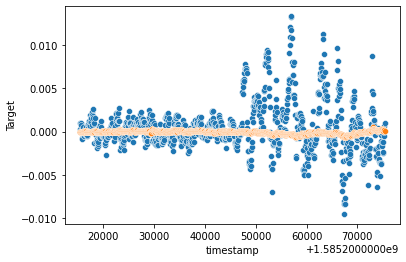

In [37]:
sns.scatterplot(x=y_test.iloc[:1000].index, y=y_test.iloc[:1000])
sns.scatterplot(x=y_test.iloc[:1000].index, y=y_predict[:1000])

In [51]:
# Test adfuller

In [ ]:
adfuller(X_train.log_returns_t_minus_1)[1]  # p-value close to 0 indicates stationarity